# K-means
Considere el conjunto de datos sin etiquetar representado en la Figura 9-2: puede ver claramente cinco manchas de instancias. El algoritmo K-Means es un algoritmo simple capaz de agrupar este tipo de conjunto de datos de forma muy rápida y eficiente, a menudo en solo unas pocas iteraciones. Fue propuesto por Stuart Lloyd en Bell Labs en 1957 como una técnica para la modulación del código de pulso, pero solo se publicó fuera de la compañía en 1982. 1 En 1965, Edward W. Forgy había publicado prácticamente el mismo algoritmo, por lo que K-Means a veces se conoce como Lloyd-Forgy.

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

In [2]:
from sklearn.cluster import KMeans
k = 3
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [3]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [4]:
y_pred is kmeans.labels_

True

In [5]:
kmeans.cluster_centers_

array([[4.29259259, 1.35925926],
       [1.462     , 0.246     ],
       [5.62608696, 2.04782609]])

In [6]:
import numpy as np
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)


array([1, 0, 1, 1], dtype=int32)

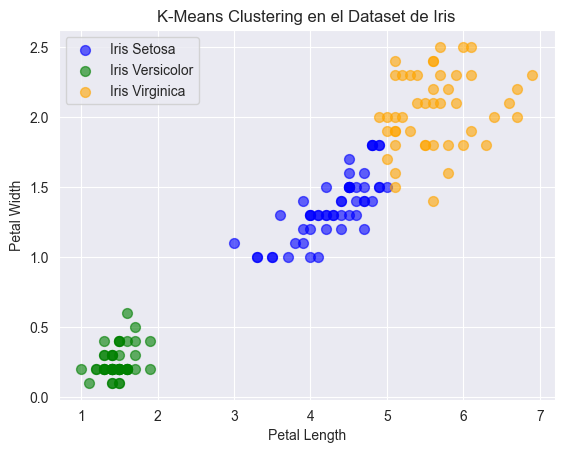

In [7]:
import matplotlib.pyplot as plt
# Colores y etiquetas para los clusters
colors = ['blue', 'green', 'orange']
labels = ['Iris Setosa', 'Iris Versicolor', 'Iris Virginica']

# Crear scatter plot
for i in range(3):
    plt.scatter(X[y_pred == i, 0], X[y_pred == i, 1],
                color=colors[i], label=labels[i], s=50, alpha=0.6)


# Etiquetas y título
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("K-Means Clustering en el Dataset de Iris")
plt.legend()
plt.show()


In [8]:
# La distancia de cada instancia a cada centroide
kmeans.transform(X_new)

array([[4.34014975, 2.28340973, 5.62629023],
       [1.44268649, 2.33280089, 2.62652242],
       [7.47488708, 5.24346832, 8.67847978],
       [7.38127334, 4.9989959 , 8.63793016]])

In [9]:
kmeans.inertia_
#inertia, which is the mean squared distance between each instance and its closest centroid

31.412885668276978

In [10]:
kmeans.score(X)

-31.412885668276974

Medimos la distancia euclidiana, y vemos que centroide se acerca más al punto. Ahora para el siguiente únto, hacemos lo mismo y calculamos la distancia al centroide y le asignamos al cluster correspondiente.
 
Una vez que se asignan todos los puntos, se deben acercar a nuestros centroides. Sumamos los valores y sacamos un promedio, obtenemos una nueva ubicación. Volvemos a repetir el proceso de las distancias y determinar de que centroide está más cerca un punto. Y volvemos a ajustar la posición de los centroides.

Cuando no cambia, es cuando se encuentran estos clusters.

In [11]:
# K means con scikit-learn 

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd 

In [12]:
clientes = pd.DataFrame({"saldo" : [50000, 45000, 48000, 43500, 47000, 52000,
                                    20000, 26000, 25000, 23000, 21400, 18000,
                                    8000, 12000, 6000, 14500, 12600, 7000],

                         "transacciones": [25, 20, 16, 23, 25, 18,
                                           23, 22, 24, 21, 27, 18,
                                           8, 3, 6, 4, 9, 3]})

In [13]:
escalador=MinMaxScaler().fit(clientes.values)

In [14]:
clientes=pd.DataFrame(escalador.transform(clientes.values),columns=["saldo","transacciones"])

In [15]:
clientes

,saldo,transacciones
0,0.956522,0.916667
1,0.847826,0.708333
2,0.913043,0.541667
3,0.815217,0.833333
4,0.891304,0.916667
5,1.000000,0.625000
6,0.304348,0.833333
7,0.434783,0.791667
8,0.413043,0.875000
9,0.369565,0.750000


In [16]:
kmeans= KMeans(n_clusters=7).fit(clientes.values)

In [17]:
kmeans.labels_

array([2, 6, 4, 2, 2, 4, 3, 3, 3, 3, 0, 3, 5, 1, 5, 1, 5, 1], dtype=int32)

In [18]:
clientes["cluster"]= kmeans.labels_

In [19]:
clientes

,saldo,transacciones,cluster
0,0.956522,0.916667,2
1,0.847826,0.708333,6
2,0.913043,0.541667,4
3,0.815217,0.833333,2
4,0.891304,0.916667,2
5,1.000000,0.625000,4
6,0.304348,0.833333,3
7,0.434783,0.791667,3
8,0.413043,0.875000,3
9,0.369565,0.750000,3


In [20]:
print(kmeans.cluster_centers_, kmeans.inertia_)

[[0.33478261 1.        ]
 [0.11231884 0.01388889]
 [0.88768116 0.88888889]
 [0.35652174 0.775     ]
 [0.95652174 0.58333333]
 [0.06231884 0.19444444]
 [0.84782609 0.70833333]] 0.11392091997479525


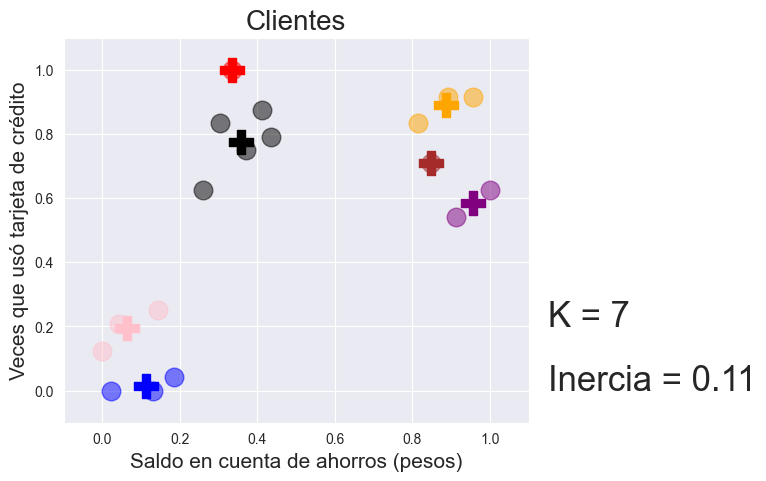

In [21]:
# Instrucciones para graficar los clusters 

plt.figure(figsize=(6, 5), dpi=100)

colores = ["red", "blue", "orange", "black", "purple", "pink", "brown"]

for cluster in range(kmeans.n_clusters):
    plt.scatter(clientes[clientes["cluster"] == cluster]["saldo"],
                clientes[clientes["cluster"] == cluster]["transacciones"],
                marker="o", s=180, color=colores[cluster], alpha=0.5)

    plt.scatter(kmeans.cluster_centers_[cluster][0],
                kmeans.cluster_centers_[cluster][1],
                marker="P", s=280, color=colores[cluster])

plt.title("Clientes", fontsize=20)
plt.xlabel("Saldo en cuenta de ahorros (pesos)", fontsize=15)
plt.ylabel("Veces que usó tarjeta de crédito", fontsize=15)
plt.text(1.15, 0.2, "K = %i" % kmeans.n_clusters, fontsize=25)
plt.text(1.15, 0, "Inercia = %0.2f" % kmeans.inertia_, fontsize=25)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.show()

del clientes["cluster"]

# Método del codo

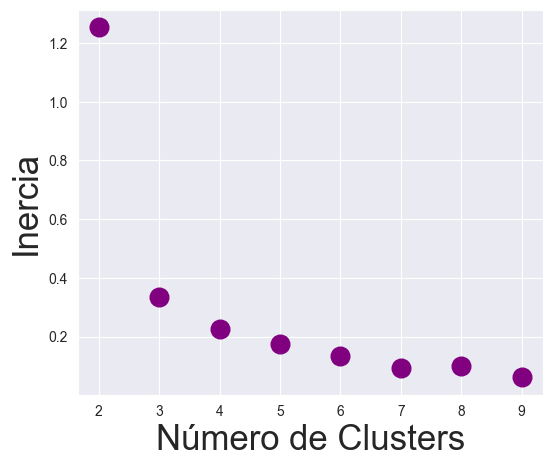

In [22]:
inercias = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(clientes.values)
    inercias.append(kmeans.inertia_)

plt.figure(figsize=(6, 5), dpi=100)
plt.scatter(range(2, 10), inercias, marker="o", s=180, color="purple")
plt.xlabel("Número de Clusters", fontsize=25)
plt.ylabel("Inercia", fontsize=25)
plt.show()